In [85]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [86]:
def isterminal(s):
    return s == 0 or s == 100

class Gambler:
    def value_iteration(self):
        sweeps = []
        values = np.zeros(101)
        new_v = np.zeros(101)
        while(True):
            sweeps.append(values)
            delta = 0
            values = np.copy(new_v)
            for s in range(1,100,1):
                actions = range(0,min(s,100-s)+1)
#                 print(actions)
#                 print(s)
#                 new_v = np.copy(values)
                action_values = np.zeros(len(actions))
                for a in range(len(actions)):
                    if(s + actions[a] >= 100):
                        action_values[a] = 0.4*(1 + new_v[s + actions[a]]) + 0.6*(new_v[s-actions[a]])
                    else:
                        action_values[a] = 0.4*(new_v[s + actions[a]]) + 0.6*(new_v[s-actions[a]])
                new_v[s] = np.max(action_values)
            delta = abs(values-new_v).max()
            print(delta)
            if(delta < 1e-4):
                sweeps.append(new_v)
                break
        return values, sweeps

0.9533440000000001
0.3688960000000001
0.13926400000000005
0.05570560000000002
0.02228224000000001
0.008912896000000003
0.0016384000000000008
0.0003932160000000005
7.602595430399994e-05


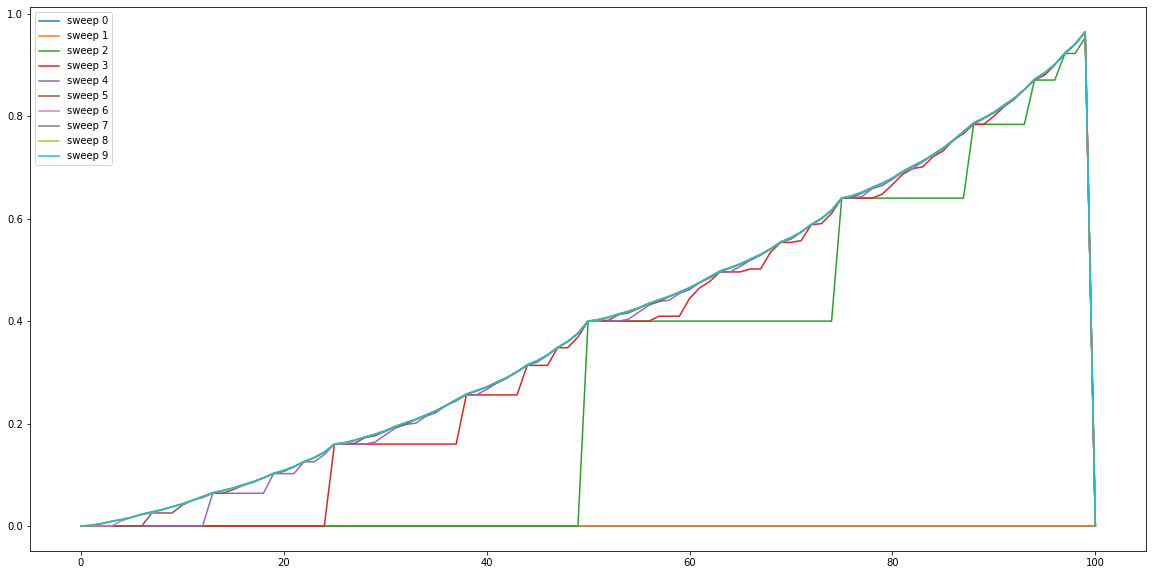

In [87]:
gambler = Gambler()
values, sweeps = gambler.value_iteration()

plt.figure(figsize=(20,10))
for i in range(len(sweeps)):
    plt.plot(sweeps[i], label="sweep " + str(i))
plt.legend()
# print(values)